In [91]:
#Importing Dependencies
from citipy import citipy
import requests
import json
import numpy as np
from api_keys import Open_Weather_Key 
import csv
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# TO DO:
* Figure out how to use the citypy library in conjunction with the openweather API to retrieve your dataset
* Create scatter plot in which [Temperature , Humidity , Wind Speed , and cloudiness] are plotted against lattitude

In [2]:
#Generate a list of random geo coordinates
longitude = np.random.uniform(-180 , 180 , size = 1500);#right
lattitude = np.random.uniform(-90 , 90 , size = 1500);#left
geo_coordinates = [lattitude , longitude];


#Generating a list of cities
cities = [citipy.nearest_city(geo_coordinates[0][i] , geo_coordinates[1][i]) for i in range(0 , len(geo_coordinates[0]))];

#Removing duplicates from cities and converting it into a list
cities = list(set(cities));

#checking we have the requisite number of unique cities
print(len(cities));

#citpy.nearest_city() receives long and lat values as arguements and returns the nearest city
#we can write a function that generates a list of 600 unique cities


608


In [3]:


#Building request url for one call to the API
key = f'&appid={Open_Weather_Key}';
base = 'http://api.openweathermap.org/data/2.5/weather?';

#Generating list of urls to make API calls
urls = [base + f'q={cit.city_name}&units=imperial' + key for cit in cities]

#Genarating a list of request objects
Requests = [requests.get(url) for url in urls];

#Converting responses to json
city_response = [req.json() for req in Requests];

#Extracting target metrics from each json object


#Converting the request objects into json format
#weather_calls = [req.json() for req in requests];



# # Requesting Weather from San Diego
# weather_request = requests.get(url);

# # Converting response object to Json
# weather_json = weather_request.json();
# #print(json.dumps(weather_json , indent=4));

# #We need to collect the following metrics for each city [longitude , lattitude , wind speed (mph) , Temperature (F) , Humidity (%) , Cloudiness (%)]

# #Collecting longitude and lattitude values (in key = 'coord)
# curr_lon = weather_json['coord']['lon'];
# curr_lat = weather_json['coord']['lat'];

# curr_wind = weather_json['wind']['speed'];
# curr_clouds = weather_json['clouds']['all'];
# curr_temp = weather_json['main']['temp']; 
# curr_hum = weather_json['main']['humidity'];

#Write information to CSV
#All collected info of a city should be one row

In [61]:

#Storing Target metrics for each city , skipping over cities that were not found
city_array = [];
for cit in city_response:
    try:
        city_metrics = [cit['name'] , cit['coord']['lon'] , cit['coord']['lat'] , cit['main']['temp'] , cit['main']['humidity'] , cit['clouds']['all'] , cit['wind']['speed']];
        city_array.append(city_metrics);

    except:
        continue



In [62]:
#Practice writing to a csv file
#We are going to want to store each city_row as a list that contains the target metrics of that city
#As an example our Heaader would be:

Header = ['City_Name' , 'Longitude' , 'Lattitude' ,'Temperature' , 'Humidity' , 'Cloudiness' , 'Wind Speed'];

#inserting header into city arrays to be printed out in a csv
city_array.insert(0 , Header)

#Writing out csv_export to a csv file
with open('City_Data.csv' , 'w' , encoding='UTF8' , newline= '') as file:

    writer = csv.writer(file);

    for i in city_array:

        writer.writerow(i);



In [63]:
#read in csv file and store as data frame
cities_df = pd.read_csv('City_Data.csv');
cities_df.head(5)

,City_Name,Longitude,Lattitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Katsuura,140.3000,35.1333,74.25,86,100,9.51
1,Srostki,85.7022,52.4189,46.85,90,54,3.71
2,‘Āhuimanu,-157.8378,21.4447,83.05,57,20,8.05
3,São João da Barra,-41.0511,-21.6403,71.08,74,10,12.12
4,Leningradskiy,178.4167,69.3833,51.84,48,96,2.04


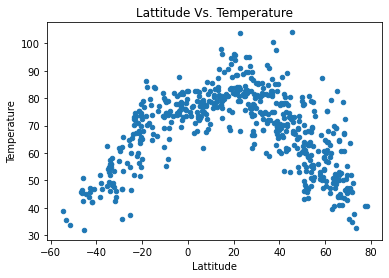

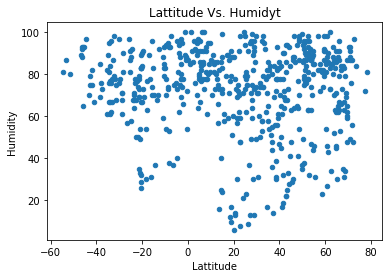

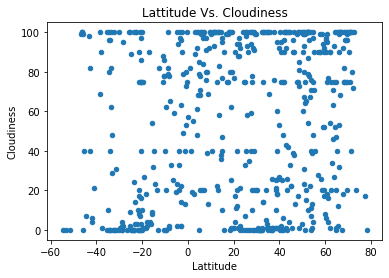

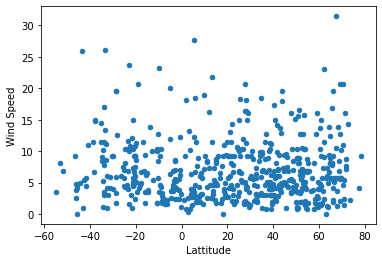

In [77]:
#Temperature Vs. Lattitude
cities_df.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title = 'Lattitude Vs. Temperature')

#Temperature Vs Humidity
cities_df.plot.scatter(x = 'Lattitude' , y = 'Humidity' , title = 'Lattitude Vs. Humidity');

#Lattitude Vs.Cloudiness
cities_df.plot.scatter(x = 'Lattitude' , y = 'Cloudiness' , title = 'Lattitude Vs. Cloudiness');

#Lattitude Vs.Wind Speed
cities_df.plot.scatter(x = 'Lattitude' , y = 'Wind Speed');

In [79]:
#Subsetting data into Northern and Southern Hemispheres
nh = cities_df[cities_df['Lattitude'] > 0];
sh = cities_df[cities_df['Lattitude'] <0];

<AxesSubplot:title={'center':'SH: Lattitude Vs. Temp'}, xlabel='Lattitude', ylabel='Temperature'>

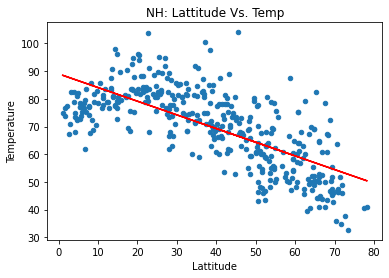

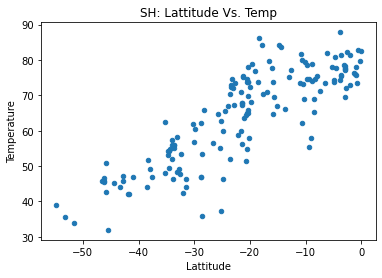

In [94]:
#Performing Linear regression on Lattitude and Temeperature relationship
nh.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title = 'NH: Lattitude Vs. Temp')
(m , b , rval , pval , stderr) = linregress(nh['Lattitude'] , nh['Temperature']);
nh_regress = nh['Lattitude'] * m + b;
plt.plot(nh['Lattitude'] , nh_regress , color='red');

#Southern Hemisphere
sh.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title= 'SH: Lattitude Vs. Temp')